# Data Science & Machine Learning @ SHSG Summer School

This notebook complements the lecture on Data Science & Machine Learning as part of the SHSG summer school curriculum. We set up the lecture in an interactive fashion such that you can apply newly learned content right away.

## Overview

1. Getting Tidy Data
2. Transforming & Processing Data
3. Modeling Data & Model Evaluation

## 1. Getting Tidy Data

On of the most appealing part of Data Science and Machine Learning is their joint ability to make data based predictions on future outcomes of the stock market, housing prizes or your next favorite show on Netflix. In addition, recent advances in neural network design as well as the increasing accessibility to computational power even facilitates object recognition towards self driving cars and self-teaching machines, which beat humans in Go and chess. However, all these wonderful applications are based on data. A lot of data. A lot of clean data.

Clean data here is the key word and, in fact, most of the time you will spend as a data scientist on a project will be spend on cleaning & transforming data -- some say this makes up to 90 % of your time. Cleaning data encompasses a variety of taks, such as removing missing values, normalizing the data values of a numeric variable, subsetting the data, etc..

In a broader picture data cleaning is part of the so-called *exploratory data analysis* where you as a data scientist take all the steps from data loading, through data processing and generating plots towards finding the right business use case. But first step first, let us load some nasty data and clean them up step by step.

### 1.1 Loading & inspecting your data

For this data cleaning example, we will work with the Boston Housing Prize data set available on Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The data set contains information on housing property in Boston, MA as well as the selling price. This data set is great to practice your data cleaning & processing skills as well as to learn regression techniques for prediction the prices of future house sells.

Before going into the details of this data set, let us load it and take a look at it:

In [47]:
import pandas as pd
import numpy as np
hsdata=pd.read_csv('train.csv')
hsdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


By using the .shape method on the pandas data frame we can learn about the total size of our data:

In [48]:
print('The data set contains ' + str(hsdata.shape[0]) + ' rows and ' + str(hsdata.shape[1]) + ' columns.')

The data set contains 1460 rows and 81 columns.


As we can see, our data set contains 1460 data point with each 81 variables. As one can read from their names, these variables describe the real estate properties such as its sales prize, the number of rooms etc. In the next step we will look a bit closer on the types of variables, also called features, we are dealing with.

### Categorical and numerical variables

Commonly, when you deal with real data sets, data come in two different types in most cases: numerical features and categorical features.

In a simplified picture, numerical features are features whose values can be put on a continuous axis such as the size of the property in square feet. By contrast, categorial features describe properties for whic that does not work, such as whether the road in front of a house is paved or graveled.

In the cell below, use the .unique() method on the feature 'Street' to display the categories of that feature. In addition, use the .describe() method to learn about the statistics of the 'SalePrice' feature.

In [49]:
### EXERCISE ### 
# Use the describe method on the Saleprice feature of the hsdata set
catlist=hsdata.Street.unique()
print('Feature categories: ' + str(catlist))
stats=...
print()
print('Statistics of the SalePrice feature:')
print(stats)

Feature categories: ['Pave' 'Grvl']

Statistics of the SalePrice feature:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


We can also distinguish between categorical and numerical features in the data set by applying the method .dtypes to our data frame, which will print the data type for each feature. Try it out:

In [50]:
### EXERCISE ###
# Apply the .dtypes method to the data frame
dtypelist=...
print(dtypelist)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


However, as it turns out many features are considered numerical by python, which in fact are not numerical in terms of their actual data type; they just happen to carry integer values to describe different categories. This is a good example of why it is of paramount importance to look into the detail of the data set. Hence, data set always have to come with a clear documentation on the data set, the data types and maybe even how the data was collected. Fortunately, the guys putting together the Boston house price data set did a good job and you can find the 'data_description.txt' file in the main directory - take a look! 
For today, we did the tidious work of looking up, which of the features are truly numerical features, as shown below.

In [51]:
# These features can be read from the supplementary text file 'data_description.txt'
num_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','TotalBsmtSF','1stFlrSF',
              '2ndFlrSF','Fireplaces','GarageCars',
              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
              '3SsnPorch', 'ScreenPorch', 'PoolArea']
hsdata[num_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,65.0,8450,196.0,706,0,150,856,856,854,0,2,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1,2,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,1,2,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,1,3,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,1,3,836,192,84,0,0,0,0


In [52]:
hsdata.drop(num_cols, axis=1).head()
cat_cols=hsdata.drop(num_cols, axis=1).columns
hsdata[cat_cols].head(5)

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,Y,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,Y,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,Y,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,Y,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,Y,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Lastly, we will make sure that for future processing all categorical features will be recognised as such by python. We can do this explicitly by using the .astype() method. What we are going to use here is a very powerful feature of pandas that is to apply a function to all row entries of a columm. We can do that by calling the .apply() method on a dataframe or dataframe subset. Inside the apply statement we use the lambda statement to in-line write a function that is going to applied to the selected data. It may look non-ituitive at first, but it is indeed very powerful and much, much fast than looping through all 1400 rows using a for loop.

In [53]:
### EXERCISE ###
# Make sure categories are recognised as such
hsdata[cat_cols]=hsdata[cat_cols].apply(lambda x: x.astype('category'))
# Print the data type of the categorical features to make sure they indeed are of category type:
...

Ellipsis

As a side note, there is of course other types of features existing such as timestamps.

### Assessing and Cleaning Missing Values

By now, we have obtained a first picture of our data set. In the next step, we start tidying it up by looking for missing data entries. Missing data are a problem in so far as many of the commonly used algorithms in data science and machine learning cannot deal with them. You may run into issues even earlier on, as soon as you try plotting data that contain such missing entries. Hence, we want and need to get rid of them!

In general, there is two different ways of dealing with missing data. One can kick out any rows and columns that contain missing data or try to fill the gaps by imputation. While the first approach, which I would call quick and dirty, always works from a technical perspective it carries the risk of deleting relevant information from your data set and/or drastically reducing your data set size.

The second approach, imputing the missing values is advantageuous in terms of keeping all your data in the set. However, it can generate variance in your data and, if one choose to impute by means of algorithms, can be computaionally expansive.

In reality, there is no black and white and one takes a case to case decision on whether to drop missing values or not. Let us see how this works on our data set.

First, we look for all missing values by applying the .isnull() method to our data frame. It looks for missing values in each feature. Conveniently, we can chain it with the .sum() method and generate a list that contains the sum of missing value for each feature.

In [54]:
total = hsdata.isnull().sum().sort_values(ascending=False)
percent = 100*(hsdata.isnull().sum()/hsdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


As one can see, for few of the features almost all of data are missing, such as for the Pool Quality feature. These cases are examples of missing at random (MAR) data, where the missingness is related to the observed data. In our present case, obviously the best option is to drop these features from our data frame, as we barely have information on them. As you have learned above, you can use the .drop() method with an inplace=True argument on your data frame.

In [55]:
### EXERCISE ###
# Drop PoolQC, MiscFeature, Alley, Fence, and FireplaceQ from the data frame using a list of columns.
# Hint: set axis=1
clist=['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu']
hsdata.drop(..., axis=1, inplace=True)

Let's have a look, which missing values are left:

In [56]:
total = hsdata.isnull().sum().sort_values(ascending=False)
percent = 100*(hsdata.isnull().sum()/hsdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Alley,1369,93.767123
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247


You may have realized that we spared the 'Alley' feature from being dropped from our data set. This is for the simple reason that in this specific case 'NA' means no alley access and not missing value. Fortunately, we could catch that issue by carefully reading the data description. Let us change that value no 'No Access'. 

For that purpose, we create an indicator variable, which tells us for which index 'Alley' has a missing value. Using that indexer, we can simply fill in the gaps by the arithmetic mean using the corresponding numpy function.

In [57]:
# Generate the index column
hsdata.Alley=hsdata.Alley.astype(str)
temp=hsdata.Alley.isnull()
# Replace missing values
hsdata.Alley[temp==True]='No Access'
hsdata.Alley=hsdata.Alley.astype('category')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Next, we want to practie our imputation skills on the 'LotFrontage' feature and replace missing values by the arithmetic mean of that feature. Again, we use the help of an indexer -- now it is your turn:

In [58]:
### EXERCISE ###
# Impute the missing values in hsdata['LotFrontage'] by replacing them with the arithmetic mean of that feature.

# Calculate arithmetic mean using np.mean() on that feature
arithmetic_mean=...
temp=...
hsdata[...][...]=...

# Let's us see what missing data is left.                        
total = hsdata.isnull().sum().sort_values(ascending=False)
percent = 100*(hsdata.isnull().sum()/hsdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Total,Percent
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


Once we have cleared all the main gaps, we can now proceed to the last remaining missing values. Since they appear to be randomly distributed across the data set, there is now two ways to deal with them. Given missing values are so sparse, one should have enough data available to impute them by means of a predictive algorithm. Alternatively, one can just drop these data, as the total loss of data, a few per cent, can be acceptable. We'll go with the latter option for now. However, be advised that in many real use case scenarios one wants to keep as much data as possible and walks the extra mile here. 

In [59]:
### EXERCISE ###
# Drop the missing values by applying the .dropna() method to our data frame. Which argument has to be set here?
hsdata.dropna(...)
total = hsdata.isnull().sum().sort_values(ascending=False)
percent = 100*(hsdata.isnull().sum()/hsdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
ExterQual,0,0.0
YearRemodAdd,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterCond,0,0.0


This is great, we have now all tidy data without missing values. Upon loading the data, this was the first and one of the most important tasks to accomplish for us. While this was a straight foward data cleaning scenario, in general, data cleaning can be arbitraliy complicated and can take loads of your time. For instance, imagine data where information, such as the postal code has to be read out of an address line or data, where each data point has unseparated entries, which first need to be separated into individual features.

With clean data at hand, we can now proceed to the next block of the lecture, where you will hear, learn and practice concepts of data processing and transformation.

One thing, which is handy at this point after cleaning the data is to single out the SalePrice feature as our target variable. This will be used later on to train a mchine learning model for predicting house prices.

In [60]:
target=hsdata.SalePrice.astype('float')
target.shape

(1338,)

# 2. Data Processing & Transformation

You just have heard about how data can be transformed, processed and even merged with other data sets. Now it is time to put your new knowledge to action and apply some of that content to our housing price data.

While the data processing & transformation encompasses a variety of task, we here focus on two very relevant aspects of data processing & transformation, which are necessary to prep our housing price data for modeling. 

## Visualizing correlation between variables

The power of machine learning algorithms is to learn the correlation between features in the data set and a target variable. Say we want to model a regression model on the house price to predict the orice of future house sells. What our machine learn algorithm does here is to learn the correlations between the house properties stored in the features we have and the house price feature by numerically optimizing a function. In many cases this does work surprisingly well. However, once features become correlated with each other themselves, many algorithms cannot deal with this type of input data. In particular linear models, which are always an easy first try when running a regression, suffer badly from correlations across the features.

Pandas provides us with a neat method to calculate the so-called correlation map between individual features. Using the heat map function from the seaborn library, we can visualize these correlations between the features. Be advised that, however, this approach only works that straight forward for numerical features. More as a side not, for categorical variables checking correlation between variables requires the application of a so-called chi-square test. For testing correlations between categorical and numerical features, a ANOVA test has to be performed. As you can see, understanding your data set can quickly bring you into the details of statistics. For that reason, we'll leave it for now by looking at correlation between numerical features.

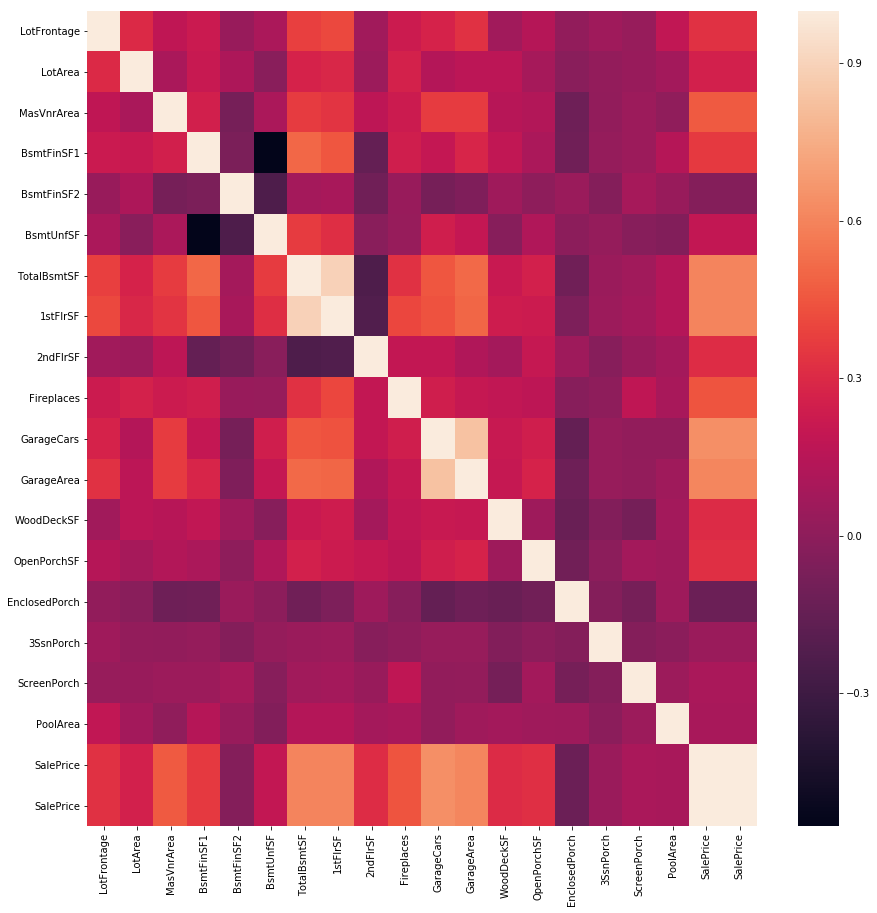

In [37]:
# Calculate the correlation map using the .corr() method on the data set
cmap=pd.concat([hsdata[num_cols], hsdata['SalePrice'].astype('float')],axis=1).corr()

# Plotting goes from here
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
# Use the .column method on the cmap to set the plot labels
sns.heatmap(cmap, 
        xticklabels=pd.concat([hsdata[num_cols], hsdata['SalePrice']],axis=1).columns,
        yticklabels=pd.concat([hsdata[num_cols], hsdata['SalePrice']],axis=1).columns)
# Show the plot
plt.show()

From this heat map we can learn three obvious things:

* Many features indeed show a significant amount of correlation among each other. This is a problem that we will address in the next step.
* Some of the feature show nearly no correlation with any of the other variable (large purple area).
* Many of the numerical features show a relatively high correlation with the SalePrice.

**Question:** We see that many features show a high correlation with the SalePrice. What is the significance of that observation in view of predicting house prices using our data set?

## Exploratory Data Analysis in a nut shell

As you have seen in the previous subsections, understanding the data structure and correlations between variables can help you a lot in taking the right action in the data cleaning & processing process. A very important of data science prior any practical business use case can be elaborated is the so-called exploratory data analysis, also called EDA in short.

EDA is about visualizing dependencies between different variables and extracting some first useful insights from your data. In fact, a lot of valueable knowledge in data science projects is often generated without using any fancy machine learning model. An easy EDA on clean data can aready help you, your company or your client to take the right decisions and ask the right questions.

Of course, an EDA can become lengthy and it is about skill and experience to distill the relevant information our of your data set. For now, we here make a mini EDA in terms of visualizing a few dependencies across the data and learn about the variance of some variables. Let's get started!

In [ ]:
### Exercise
# Visualize the dependence between 'LotFrontage' and the 'SalePrice' variable
plt.scatter(hsdata.SalePrice.astype('float'), ...)
plt.xlabel('Saleprice')
plt.ylabel('Lot Frontage')
plt.show()

**QUESTION:** Is there a clear correlation between the Saleprice and the LotFrontage feature? If so, does that make sense? Looking up the meaning of that feature could help you answer this question.

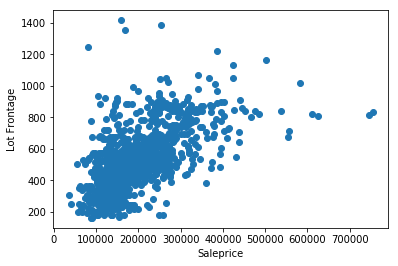

In [153]:
### Exercise
# Visualize the dependence between 'GarageArea' and the 'SalePrice' variable
plt.scatter(..., ...)
plt.xlabel('Saleprice')
plt.ylabel('Lot Frontage')
plt.show()

**QUESTION:** Is there a clear correlation between the Saleprice and the LotFrontage feature? It seems the Garage Area values have a lot of variance at all Sale Prie values. Think about it, what is the significance of a lot of variance towards training a regression model?

In [ ]:
### Exercise
# Visualize the dependence between 'PoolArea' and the 'SalePrice' variable
plt.scatter(..., ...)
plt.xlabel('Saleprice')
plt.ylabel('Pool Area')
plt.show()

**QUESTION:** Do you see a correlation here? What is the most obvious answer why most Pool area values are zero? Is this variable any useful in that case?

Great, we are done with our mini EDA. We hope this gave you a rough idea how one can approach that. In many real business use cases, one typically digs deeper. In addition, typically more sophisticated statistical tools are employed to obtain quantitative answers about the amount and types of variance of variables, for instance.

## EXERCISE: Brainstorming & Discussion Round with Nicole
Often data sets can be enriched with data from external sources. In this way, additional relevant information is added.

**Question:** Which additional data could render valuable when added to the housing price data set in your opinion?

## Feature Normalization

Feature normalization processes each numerical feature of a data se such that it has zero mean and unity width. This step is of paramount importance for when dealing with numerical features. Often, the range of value for each feature can vary by orders of magntidue, as can be seen from our numerical features below.

In [61]:
hsdata[num_cols].head(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,65.0,8450,196.0,706,0,150,856,856,854,0,2,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1,2,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,1,2,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,1,3,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,1,3,836,192,84,0,0,0,0


This large scale of numerical values across the features can pose serious problems for machine learning algorithms during training and it is good practice to normalize the numerical features of a data set. Conveniently, the sklearn library has a built in function that can help us on that task - try it out!

In [75]:
### EXERCISE ###
# Use the scale function normalize the features of the numerical variables
from sklearn.preprocessing import scale
temp=pd.DataFrame(hsdata[num_cols])
num_feat_scale=pd.DataFrame(scale(temp))
num_feat_scale.columns=num_cols

# Generate a copy of the existing data frame & fill in the scaled numerical feature values
hsdata_scaled=pd.concat([hsdata.drop(num_cols, axis=1),num_feat_scale],axis=1,join_axes=[hsdata.index])
print(hsdata_scaled.shape)
hsdata_scaled.head(5)

(1338, 77)


,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,2ndFlrSF,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,1,60,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,...,1.128813,-1.005546,0.202747,0.249341,-0.779554,0.202294,-0.349612,-0.118688,-0.283203,-0.071771
1,2,20,RL,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,...,-0.811389,0.544478,0.202747,-0.222023,1.557895,-0.731311,-0.349612,-0.118688,-0.283203,-0.071771
2,3,60,RL,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,...,1.156076,0.544478,0.202747,0.570726,-0.779554,-0.088501,-0.349612,-0.118688,-0.283203,-0.071771
3,4,70,RL,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,...,0.906167,0.544478,1.779928,0.752844,-0.779554,-0.195636,4.122511,-0.118688,-0.283203,-0.071771
4,5,60,RL,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,...,1.580921,0.544478,1.779928,1.791989,0.726453,0.554309,-0.349612,-0.118688,-0.283203,-0.071771


Great to see it has worked. As a note, regarding categorical features, this step cannot and does not need to be performed, of course.

## Principal Component Analysis

With Principal Component Analysis (PCA) we can remove correlation between variables, which will help us on our goal to make our data ready for modeling. In a nutshell, what PCA does is to orthogonalize all features with respect to each other. This way, correlations between features are removed. In addition to that, PCA reduces the amount of feature. In case, you are working on a data set with a large ampunt of features, this can be very helpful, since PCA effectively projects all information in a lower dimensional space. I this way, one could reduce the amount of features from say 100 to 10.

Considering our house price data, we'll do that now. First, we are going to convert all categorical features into dummy features. This is an important step, as PCA only works on numerical features. As an example, consider a categorical feature with 3 categories cat=[a,b,c]. What one typically does is to create three dummy features [cat_a, cat_b, cat_c]. If a data point is of category a, the dummies would read [cat_a, cat_b, cat_c]=[1,0,0], if it were of category b [cat_a, cat_b, cat_c]=[0,1,0] and so on. These dummy features are now numerical variables, which can in fact serve as input to any model. Let's do it, it's fairly simple.

Before that, we want to remove the *SalePrice* and *Id* feature from our data set. The reason is that this is the very last step before modeling, where we convert the entire data set into a numerical matrix. Of course, we do not want to include our target variable, Saleprice, into that as well as the Id of each data point.

In [118]:
### EXERCISE ###
# Drop the columns stored in dlist from our scaled data frame
dlist=['Id', 'SalePrice']
... .drop(..., ..., ...)

# Use the .get_dummy method(X) on the hsdata_scaled cateogircal data to generate dummy features and
dummies=pd.get_dummies(hsdata_scaled.drop(num_cols, axis=1))
# Reset index before merging with numerical features. 
# Otherwise the data cannot be joined on the index and everything is going to be messed up.
dummies.reset_index(drop=True, inplace=True)
# Join the categorical dummy data frame with the numerical data
hsdata_scaled_dummies=pd.concat([dummies,num_feat_scale],axis=1, join_axes=[dummies.index])
hsdata_scaled_dummies.dropna(axis=1, inplace=True)
print(hsdata_scaled_dummies.shape)
print(dummies.shape)
dummies.head(5)

(1338, 1520)
(1338, 1502)


,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


As you can see, we have drastically increased the amount of features by creating dummies. This is quite obvious, considering that for each feature all categories are projected into their own column, i.e. feature.

In the next step, let us run the PCA on our data. Fortunately, the sklearn library comes already with the corresponding functionality.

In [136]:
# fit a PCA to our scaled numerical feature data set 'num_feat_scale'
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
pca.fit(np.array(hsdata_scaled_dummies))
hsdata_scaled_dummy=pca.transform(np.array(hsdata_scaled_dummies))
hsdata_scaled_dummy.shape
hsdata_scaled_dummy

array([[ 0.82684172, -2.15615329,  1.17381353, ...,  0.00630399,
        -0.23139022, -0.28578816],
       [ 0.23679016,  1.72402872,  0.09028976, ...,  0.99368   ,
         0.2223711 , -0.24493099],
       [ 1.42495516, -2.02664585,  1.13498799, ...,  0.14376171,
        -0.1916448 ,  0.0999091 ],
       ..., 
       [-0.37803785, -1.27931973,  0.76616877, ..., -0.14931268,
        -0.42378989, -0.26681125],
       [-2.57140504,  3.19837037,  0.62150011, ..., -0.17774519,
         0.10574803,  0.16698334],
       [-0.68904547,  2.53184687,  1.20224163, ...,  0.17030973,
         0.07488231, -0.14155851]])

It should be noted that we took a layman's approach on doing PCA on categorical features by 'faking' them into numerical features using the dummies. In fact, this works in many cases and is very convenient and also, many people do it without having problems. However, this approach is technically not correct and the right way to do a PCA on categorical features, is to run a so-called Multiple Correspondence Analysis (MCA). However, this is a bit more abstract than a simple PCA and beyond the scope of this class today. So we are fine taking the layman's way today.

With that we are done with the heavy lifting on the part of data cleaning, processing and transformation. Everything is well prepared for applying machine learning models to our nicely prepared data in the next section.

# Modeling Data

The goal of this section is to practice your freshly learned modeling knowledge on the Boston house price data you have so thoroughly cleaned. More specifically, what we going to do is to train a regression model on the data set and use that model to predict house prices of future house sells.

#### Train - Test - Split

When it comes to training a machine learning model, it is also relevant to make an assessment on how good the model is. For that purpose one splits up the data sets into so-called training and test subsets, where the model is trained on the training set and its performance is tested on the test set. In this way, one can make sure that the model performance is tested on *unseen* data. The reason for that is that machine learning models can easily adjust themselves to tiny details of the training set and obtain great accuracy on that. However, once applied to unseed data, the performs poorly. This is called overfitting. To get an unambiguous estimate on the model performance, testing on unseen data is therefore required. 

Let us do this so-called train-test-split by using the built-in function from the sklearn library.

In [155]:
### EXERCISE ###
# use the train_test_split(X,y,...) function on our data scaled dummy set and the logtarget feature to generate training and test subsets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(..., np.log(target), test_size=0.2, random_state=123)

Now we have all in hand we need to test one relatively simple and one more complicated regression model.

#### Ridge Regression

Ridge regression is a linear regression model. Linear models try to fit a function to the input data by simply creating a linear model of the features such as y=a*feature1+b*feature2+c*feature3 +.... What happens during training is that the algorithm tries to adjust the model parameter a,b,c,... in order to find the otptimum functin to describe the target, in our case the housing price. To make linear models less prone to overfitting, they are expanded by an additional term, the L2 norm, in addtion. This term penalizes large training parameters, which is why such a model is called Ridge model. We won't go too much into the theory here, as this will be out of scope but you can find vast literature on details and tuning possibilities of linear models online.

Conveniently, the sklearn library comes with an included GridSearchCV functinality. This feature finds the best model parameters automatically by doing k-fold cross validation on the training data and saves us basically from doing a more sophisticated model parameter tuning by hand.

But now let's train the model!

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# Set up Ridge regression
rr_model = GridSearchCV(Ridge(), cv=5, 
                        param_grid={"alpha": [100,10, 1e1, 1e0, 0.1, 0.01]})
rr_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [100, 10, 10.0, 1.0, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Once the model is fitted, we can apply it to our test data set and see how well it did. The metric we are going to use here, is the so-called R^2 value (https://en.wikipedia.org/wiki/Coefficient_of_determination). The R^2 value describes, which amount of the variance in our data can be explained by the model. For instance, a R^2 value of 1 means that our model perfectly fits our data and can explain even tiny variations. On the opposite, a R^2 value close to 0 indicates that our model performs poorly and is not able to describe the variance in our data. Let's see how well we did:

In [138]:
# Compute model accuracy
print('Ridge regression obtains a R^2 value of ' + str(rr_model.score(X_test, y_test))+'.')

Ridge regression obtains a R^2 value of 0.66033661802.


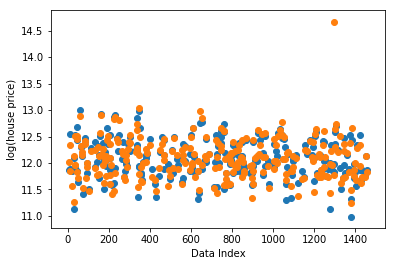

In [149]:
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, rr_model.predict(X_test))
plt.xlabel('Data Index')
plt.ylabel('log(house price)')
plt.show()

I wouldn't say wow, but considering the simplicity of our model, we are even able to describe 66 % of the variance in our data with the Ridge regression. Also when we look at the plot it seems our model does fairly well. Given the large complexity of our data, once can imagine that simple models such as a linear model may have trouble to capture the full picture.

### Gradient Boosting Regression

For that reason, Let us also try a more complex model, the gradient boosting regressor, and see how well that does. Gradient boosting machines (GBM) are highly competitive tree-based machine learning algorithms, which often are the winner's choice in data science contests, for instance on Kaggle. In many examples, GBMs even outperform deep neural networks, which themselves are highly powerful and modern machine learning models. If you are interested in learning the details of that algorithm, this blogpost gives a good overview of how it works: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

Let's try it out and see what we get:

In [143]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr_model=GBR(n_estimators=10000, learning_rate=0.05, max_depth=3, max_features='sqrt',
              min_samples_leaf=5, min_samples_split=10, loss='huber').fit(X_train, y_train)
print('Gradient Boosting Regression obtains a R^2 value of ' + str(gbr_model.score(X_test, y_test))+'.')

Gradient Boostin Regression obtains a R^2 value of 0.827711782089.


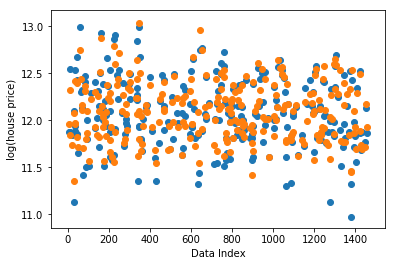

In [150]:
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, gbr_model.predict(X_test))
plt.xlabel('Data Index')
plt.ylabel('log(house price)')
plt.show()

Obviously, using GBM regression without even tuning the parameter gives you an increase of accuracy by 17 % compared to the linear model. That is a lot in the world of machine learning. Considering, that we haven't even trained our GBM model, you can imagine that there is a lot of optimization potential left.

**EXERCISE:** PLay around with the model parameter and see whether you can increase the accuracy of both models. You may also want to try to optmize the PCA we did above. We chose 100 components deliverately. See whether reducing the features to less or more than 100 using PCA has an effect on the accuracy.

# Conclusion

That's it. You have gone the full way from data loading, through data cleaning, data processing, data transformation to training a machine learning model -- awesome! We hoped you enjoyed doing that and that we ignited your interest in some concepts of data science and machine learning. We could only highlight a very little part of the data science and machine learning cosmos but hope to have taught you some general concepts of how a data science project may look like. Please tell us which part of this lecture and exercises you liked and also, which parts you didn't like. This way, we can do a better job next time.

If you are interested in learning more about data science, Kaggle provides you with great resources. It has a vast amount of different data sets to play with, maintained tutorials on python, data science, deep learning, etc. and a lot of people share their knowledge and tutorials, which may be very helpful to you. www.Kaggle.com -- you should check it out.

If you are more interested in online classes that include videos, homework assessments and a certificate you may want to check out Coursera. There are indeed great courses on data science and meachine learning tought by leading professors in that field. Usually, these classes can be accessed by paying a flat fee of USD49 per month, take a look!